# Clasificación de Noticias Utilizando Técnicas de Procesamiento del Lenguaje Natural.
**Autor original: Carlos Zainea**\
**Modificado por: Elias Buitrago B.**\
Bogotá, Colombia \
Actualizado: 30 oct 2023 \
_Nota: Código ajustado para su ejecución en Google Colaboratory_\
Actualizado para las versiones recientes de las librerías, pero no se encuentra depurado respecto a la versión original del año 2020_

In [2]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32898 sha256=fd0843aaec3c2ebf9df45dfb3ad40f2f8f6ec2d4b024b11f6e8b4f4822b356bc
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


Importar librerias para el trabajo:

In [3]:
import re
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np
from bs4 import BeautifulSoup
from PIL import Image
from urllib.request import urlopen
from wordcloud import WordCloud, ImageColorGenerator
from stop_words import get_stop_words
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Noticiastrain=pd.read_excel("/content/drive/MyDrive/proyecto ciencia de datos/Noticias2ver.xlsx",index_col=0)

In [6]:
pd.value_counts(Noticiastrain['Tipo'])

Variedades            244
colombia              181
Politica y Opinion    125
deportes              113
mundo                 101
Justicia               73
bogota                 60
economia               51
salud                  27
Name: Tipo, dtype: int64

**¿Qué es PLN?**
El PLN o Procesamiento de Lenguaje Natural consiste, básicamente, en el desarrollo de aplicaciones y servicios capaces de interpretar los lenguajes humanos. Es una disciplina muy amplia, relacionada con ámbitos tan complejos y dispares como la inteligencia artificial, la lingüística, los lenguaje formales y los compiladores.

**¿Qué hace la librería NLTK?**
​ NLTK está destinado a apoyar la investigación y la enseñanza en procesamiento de lenguaje natural (PLN) o áreas muy relacionadas, que incluyen la lingüística empírica, las ciencias cognitivas, la inteligencia artificial, la recuperación de información, y el aprendizaje de la máquina.

**Gensim** es una librería usada para hacer topic modeling. Dentro de esta funcionalidad vienen incluidos un montón de algoritmos que permiten crear este tipo de soluciones. Además de esto, viene con distintos corpus.



In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=set(stopwords.words('spanish'))
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
path = get_tmpfile("word2vec.model")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
Noticias2=[]
try:
    for i in Noticiastrain["contenido"]:
        Noticias2.append(re.sub( "[^A-Za-zóáéíúÁÉÍÓÚüÜñ.]+",' ',i))
except Exception:
    pass

In [9]:
Noticiasinparada=[]
for i in range(len(Noticias2)):
    Noticiasinparada.append([j.lower() for j in Noticias2[i].split() if not j.lower() in stopwords])

¿**Qué hace la librería SKLearn?**
Scikit-learn es uno de los open-source y bibliotecas de aprendizaje automático más populares en Python. La biblioteca scikit-learn contiene muchas herramientas eficientes para aprendizaje automático y modelado estadístico, incluyendo clasificación, regresión, agrupación, y reducción de dimensionalidad.

**K-means** es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características.

**NumPy** es muy útil para realizar cálculos lógicos y matemáticos sobre cuadros y matrices. Puede realizar estas operaciones de manera mucho más rápida y eficaz que las listas de Python. Los arrays de NumPy tienen algunas ventajas sobre las listas tradicionales de Python.

In [10]:
from sklearn.cluster import KMeans
import numpy as np
model = Word2Vec(Noticiasinparada, vector_size=100, window=10, min_count=1, workers=4)
model.save("word2vec.model")

In [11]:
model = Word2Vec.load("word2vec.model")
model.wv.index_to_key

['cuarentena',
 'p.m.',
 '.',
 'coronavirus',
 'santa',
 '...',
 'país',
 'colombia',
 'hacer',
 'ahora',
 'gente',
 'pico',
 'personas',
 'pasó',
 'modelo',
 'bucaramanga',
 'cédula',
 'marta',
 'si',
 'clientes',
 'sitios',
 'piden',
 'bahía',
 'sexuales',
 'webcam',
 'cumpla',
 'luce',
 'so',
 'conejo',
 'elena',
 'desnudarse',
 'consolar',
 'fantasías',
 'multada',
 'implementan',
 'cristalina',
 'puede',
 'salud',
 'ser',
 'tiempo',
 'covid',
 'gobierno',
 'policía',
 'años',
 'ciudadanos',
 'así',
 'trata',
 'dos',
 'según',
 'casos',
 'solo',
 'además',
 'pandemia',
 'antioquia',
 'empresa',
 'departamentos',
 'confinamiento',
 'alcohol',
 'aplicar',
 'días',
 'nacional',
 'comparendos',
 'llegará',
 'cartagena',
 'parte',
 'medidas',
 'fla',
 'antiséptico',
 'dijo',
 'baja',
 'generación',
 'hace',
 'conductores',
 'millones',
 'c',
 'masivo',
 'momento',
 'mundo',
 'bogotá',
 'cuenta',
 'residuos',
 'sustenta',
 'cada',
 'despido',
 'tener',
 'barrenderos',
 'crisis',
 'despid

In [12]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [13]:
Cat=list(Noticiastrain["Tipo"].value_counts().index)

In [14]:
dictCodeCat={Cat[i]:i for i in range(len(Cat))}
dictCodeCat

{'Variedades': 0,
 'colombia': 1,
 'Politica y Opinion': 2,
 'deportes': 3,
 'mundo': 4,
 'Justicia': 5,
 'bogota': 6,
 'economia': 7,
 'salud': 8}

In [15]:
CodeCat=[Cat.index(i) for i in Noticiastrain["Tipo"]]

In [16]:
NoticiasinparadaC=[" ".join(i) for i in Noticiasinparada]

In [17]:
DF=pd.DataFrame({"Contenido_limpio":NoticiasinparadaC,"Tipo":Noticiastrain["Tipo"],"CodeCat":CodeCat})

In [18]:
DF

,Contenido_limpio,Tipo,CodeCat
Columna1,,,
0,medio coyuntura ocasionada propagación coronav...,economia,7
1,jueves noveno día cuarentena nacional presiden...,Politica y Opinion,2
2,jenny prieto álex caro pareja cultivadores jen...,Variedades,0
3,aunque secretaría educación recomendó padres f...,bogota,6
4,presidente congreso lidio garcía anunció próxi...,Politica y Opinion,2
...,...,...,...
970,frente medidas preventivas dispuesto gobierno ...,economia,7
971,agosto año pasado hombre años presentó tutela ...,Justicia,5
972,presidente iván duque aseguró entrevista pregu...,Politica y Opinion,2


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF['Contenido_limpio'],
                                                    DF['CodeCat'],
                                                    test_size=0.15,
                                                    random_state=8)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(encoding='utf-8',
                        stop_words=None,
                        lowercase=False,
                        ngram_range = (1,2),
                        max_df=10,
                        min_df=1,
                        max_features=300,
                        norm='l2',
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(828, 300)
(147, 300)


In [21]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(dictCodeCat.items()):
  features_chi2 = chi2(features_train, labels_train == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}' category:".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
  print("")

# 'Justicia' category:
  . Most correlated unigrams:
. extradición
. vuelo
. tribunal
. prisiones
. carcelaria
  . Most correlated bigrams:
. fiscalía general
. corte suprema

# 'Politica y Opinion' category:
  . Most correlated unigrams:
. prepararnos
. promotores
. congresista
. sesionar
. senadores
  . Most correlated bigrams:
. sesiones virtuales
. señor director

# 'Variedades' category:
  . Most correlated unigrams:
. banda
. world
. apple
. microsoft
. videojuegos
  . Most correlated bigrams:
. aplicación spotify
. ministerio educación

# 'bogota' category:
  . Most correlated unigrams:
. intensivo
. homicidios
. arriendos
. bono
. ctpd
  . Most correlated bigrams:
. bogotá región
. contrato social

# 'colombia' category:
  . Most correlated unigrams:
. villavicencio
. ipiales
. valledupar
. cédulas
. gobernadora
  . Most correlated bigrams:
. fiscalía general
. cédulas terminadas

# 'deportes' category:
  . Most correlated unigrams:
. ligas
. fifa
. messi
. tour
. juventus
  . 


**Esta parte corresponde a clasificador bayesiano**


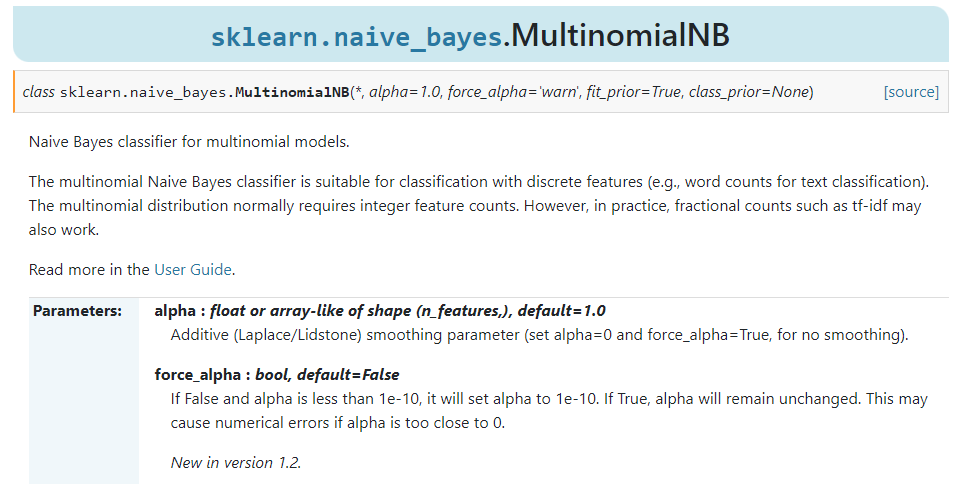

In [22]:
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns

mnbc = MultinomialNB(alpha=0.5,fit_prior=True)
mnbc

MultinomialNB(alpha=0.5)

In [23]:
mnbc.fit(features_train, labels_train)

MultinomialNB(alpha=0.5)

In [24]:
mnbc_pred = mnbc.predict(features_test)

In [25]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.6304347826086957


In [26]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.3877551020408163


In [27]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.31      0.80      0.44        30
           1       0.43      0.41      0.42        29
           2       0.27      0.19      0.22        21
           3       0.89      0.50      0.64        16
           4       0.55      0.35      0.43        17
           5       0.33      0.07      0.12        14
           6       0.00      0.00      0.00         8
           7       1.00      0.22      0.36         9
           8       0.00      0.00      0.00         3

    accuracy                           0.39       147
   macro avg       0.42      0.28      0.29       147
weighted avg       0.44      0.39      0.36       147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


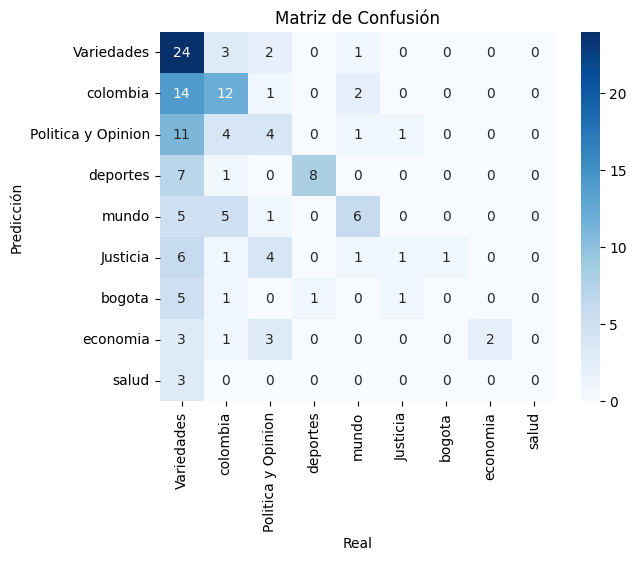

In [28]:
aux_df = DF[['Tipo', 'CodeCat']].drop_duplicates().sort_values('CodeCat')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure()
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Tipo'].values,
            yticklabels=aux_df['Tipo'].values,
            cmap="Blues")
plt.ylabel('Predicción')
plt.xlabel('Real')
plt.title('Matriz de Confusión')
plt.show()



**Clasificacion por regresion logistica**

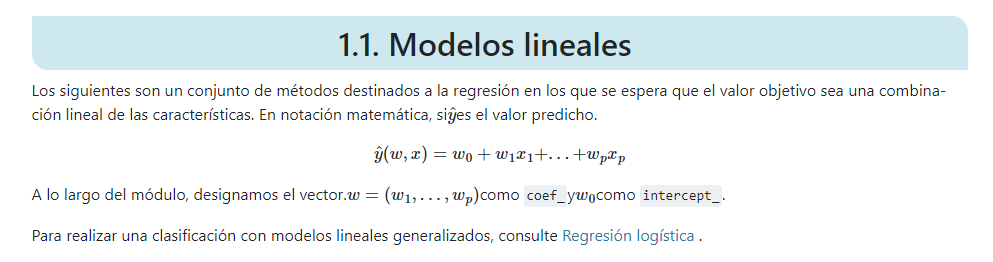

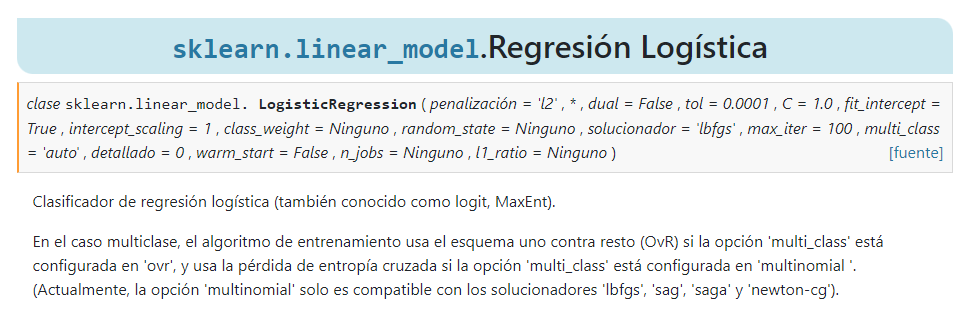

The training accuracy is: 
0.6292270531400966
Classification report
              precision    recall  f1-score   support

           0       0.30      0.83      0.44        30
           1       0.50      0.52      0.51        29
           2       0.18      0.10      0.12        21
           3       0.78      0.44      0.56        16
           4       0.50      0.24      0.32        17
           5       0.33      0.07      0.12        14
           6       0.00      0.00      0.00         8
           7       1.00      0.11      0.20         9
           8       0.00      0.00      0.00         3

    accuracy                           0.37       147
   macro avg       0.40      0.26      0.25       147
weighted avg       0.42      0.37      0.33       147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


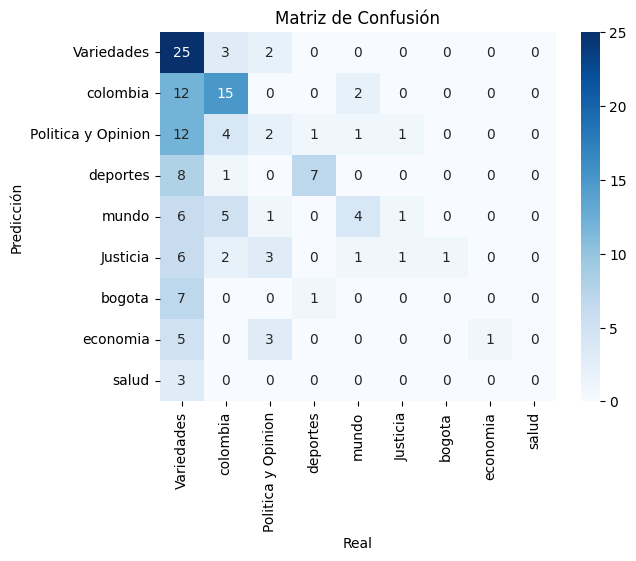

In [31]:
from sklearn.linear_model import LogisticRegression

mnbc = LogisticRegression(random_state = 35)
mnbc
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

aux_df = DF[['Tipo', 'CodeCat']].drop_duplicates().sort_values('CodeCat')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure()
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Tipo'].values,
            yticklabels=aux_df['Tipo'].values,
            cmap="Blues")
plt.ylabel('Predicción')
plt.xlabel('Real')
plt.title('Matriz de Confusión')
plt.show()




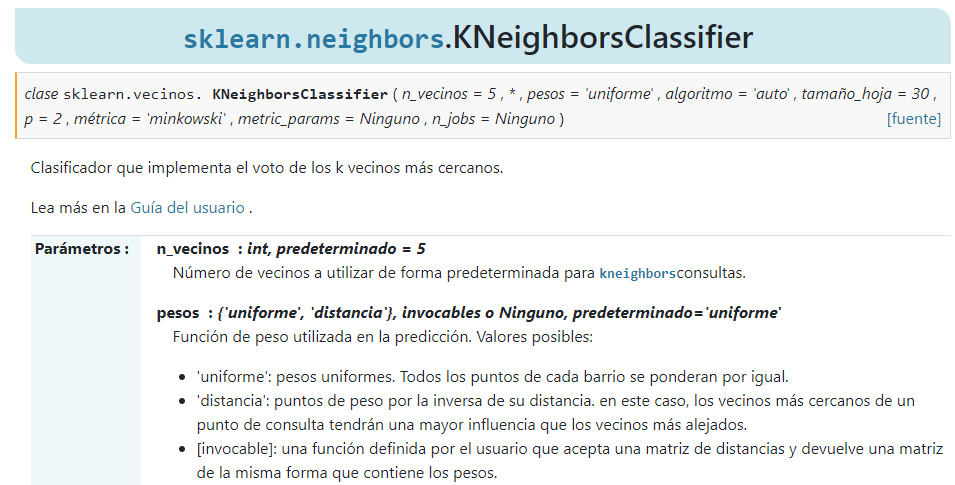

The training accuracy is: 
0.8417874396135265
Classification report
              precision    recall  f1-score   support

           0       0.39      0.43      0.41        30
           1       0.33      0.62      0.43        29
           2       0.12      0.10      0.11        21
           3       0.43      0.38      0.40        16
           4       0.33      0.18      0.23        17
           5       0.29      0.14      0.19        14
           6       0.50      0.38      0.43         8
           7       0.67      0.22      0.33         9
           8       0.00      0.00      0.00         3

    accuracy                           0.33       147
   macro avg       0.34      0.27      0.28       147
weighted avg       0.34      0.33      0.32       147



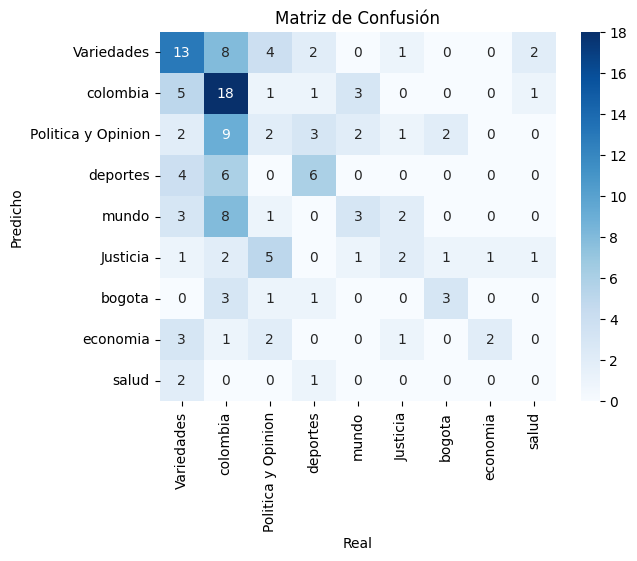

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

mnbc = KNeighborsClassifier(n_neighbors=1,weights='uniform')
mnbc
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

aux_df = DF[['Tipo', 'CodeCat']].drop_duplicates().sort_values('CodeCat')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure()
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Tipo'].values,
            yticklabels=aux_df['Tipo'].values,
            cmap="Blues")
plt.ylabel('Predicho')
plt.xlabel('Real')
plt.title('Matriz de Confusión')
plt.show()